# Airbnb price prediction

## Data exploration

In [410]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

### Load data


In [411]:
dir_seatle = "data/Seatle"
dir_boston = "data/Boston/"

seatle_data = pd.read_csv(os.path.join(dir_seatle, "listings.csv"))
boston_data = pd.read_csv(os.path.join(dir_boston, "listings.csv"))
seatle_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [412]:
seatle_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [415]:
boston_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [416]:
seatle_data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [417]:
boston_data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


## Data cleaning


First of all, the column of price is not in the right format we need to convert it to float.

In [418]:
# Convert columns with dollar symbol ($) and , symbol (,) to float
seatle_data["price"] = seatle_data["price"].str.replace(',', '').str.replace('$', '').astype(float)
boston_data["price"] = boston_data["price"].str.replace(',', '').str.replace('$', '').astype(float)
seatle_data.dropna(subset=["price"], inplace=True)
boston_data.dropna(subset=["price"], inplace=True)

Remove outliers

In [419]:
seatle_data = seatle_data[seatle_data['price'] < se["75%"]]
boston_data = boston_data[boston_data['price'] < bo["75%"]]

In [420]:
#make a list of wanted columns
cols_to_keep = [
       'id', 'space', 'neighborhood_overview','host_since', 'host_response_time', 'host_response_rate',
        'host_is_superhost', 'neighbourhood','zipcode','latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities',
       'price', 'extra_people', 'minimum_nights','maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365',  'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value', 
       'reviews_per_month']

In [421]:
seatle_data = seatle_data[cols_to_keep]
boston_data = boston_data[cols_to_keep]

In [422]:
def get_cat_num_columns(df):
    '''return the list of categorical and numeric columns'''
    num_columns = df.select_dtypes(include=np.number).columns.tolist()
    cat_columns = df.columns.drop(num_columns)
    return cat_columns, num_columns

def get_nan_percentage(df):
    ''' return the nan percentage for each column in df.
    
    '''
    # percentage of values that are missing
    total_nan = df.isna().sum().sort_values(ascending=False)
    percentage_nan = (total_nan / df.shape[0]) * 100
    tabel = pd.concat([total_nan, percentage_nan], axis=1, keys=['Total_nan_values', 'Percentage_of_nan_values'])
    return tabel

In [423]:
seatle_cat_cols, seatle_num_cols = get_cat_num_columns(seatle_data)
boston_cat_cols, boston_num_cols = get_cat_num_columns(boston_data)

Text(0.5, 1.0, 'Seatle columns with nan values percentage higher than 10')

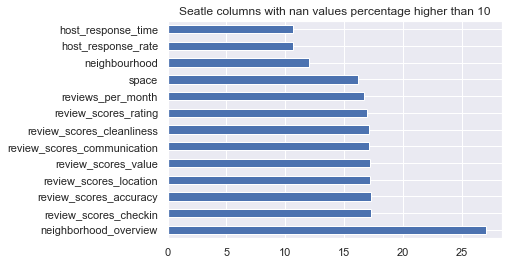

In [424]:
nan_data = get_nan_percentage(seatle_data)
nan_perc = 10
nan_data["Percentage_of_nan_values"][nan_data["Percentage_of_nan_values"] > nan_perc].plot.barh()

plt.title("Seatle columns with nan values percentage higher than {}".format(nan_perc))

Text(0.5, 1.0, 'Seatle columns with nan values percentage higher than 10')

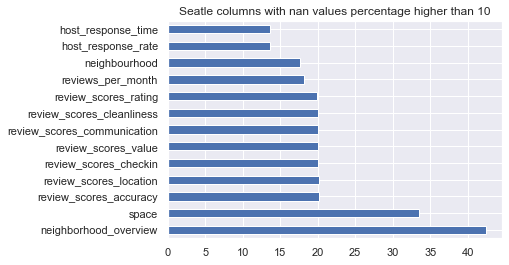

In [425]:
nan_data = get_nan_percentage(boston_data)
nan_perc = 10
nan_data["Percentage_of_nan_values"][nan_data["Percentage_of_nan_values"] > nan_perc].plot.barh()

plt.title("Seatle columns with nan values percentage higher than {}".format(nan_perc))

### Fill missing values

First we verify if the target has missing values in both datasets

In [426]:
# count nan values
print("Seatle price has {} nan values".format(seatle_data["price"].isnull().sum()))
print("Boston price has {} nan values".format(boston_data["price"].isnull().sum()))

Seatle price has 0 nan values
Boston price has 0 nan values


#### Handling values type
 Handling numeric and categorical values separately. 
 


**Categorical fill nan**

In [427]:
# impute missing values with the most frequent class
# seatle data
for var in seatle_cat_cols:
    seatle_data[var].fillna(seatle_data[var].value_counts().index[0], inplace=True)
    
# Boston data
for var in boston_cat_cols:
    boston_data[var].fillna(boston_data[var].value_counts().index[0], inplace=True)



**Numerical fill ann**

In [428]:
# Seatle data
for var in seatle_num_cols:
    seatle_data[var].fillna((seatle_data[var].mean()), inplace=True)
# Boston data
for var in boston_num_cols:
    boston_data[var].fillna((boston_data[var].mean()), inplace=True)

In [429]:
# verify if there is nan values
seatle_data.isnull().sum().max()

0

In [430]:
# verify if there is nan values
boston_data.isnull().sum().max()

0

 Before work with numeric and categorical data, some numeric columns are declared as objects with others symbols. Therefore, we start by converting these columns to float. 


In [431]:
# convert host_response_rate column which have % symbol to float
seatle_data["host_response_rate"] = seatle_data["host_response_rate"].str.replace('%', '').astype(float)
boston_data["host_response_rate"] = boston_data["host_response_rate"].str.replace('%', '').astype(float)

In [432]:
# Create 3 new col which holds only year, month and month-year seperately for host since col. 
# This will help us in our analysis to answer business questions.

seatle_data['host_since_Year'] = pd.DatetimeIndex(seatle_data['host_since']).year.astype(int)
seatle_data['host_since_month'] = pd.DatetimeIndex(seatle_data['host_since']).month.astype(int)
seatle_data['host_since_year-month'] = pd.to_datetime(seatle_data['host_since']).dt.to_period('M')

boston_data['host_since_Year'] = pd.DatetimeIndex(boston_data['host_since']).year.astype(int)
boston_data['host_since_month'] = pd.DatetimeIndex(boston_data['host_since']).month.astype(int)
boston_data['host_since_year-month'] = pd.to_datetime(boston_data['host_since']).dt.to_period('M')




In [433]:

# Convert zip code to numeric
seatle_data['zipcode'] = pd.to_numeric(seatle_data['zipcode'], errors='coerce')
boston_data['zipcode'] = pd.to_numeric(boston_data['zipcode'], errors='coerce')
# remove rows with misisng zipcode
seatle_data = seatle_data.dropna(subset=['zipcode'], how='any', axis =0)
boston_data = boston_data.dropna(subset=['zipcode'], how='any', axis =0)
# convert zip code to int
seatle_data['zipcode']=seatle_data['zipcode'].astype(int)
boston_data['zipcode']=boston_data['zipcode'].astype(int)

# Three insights

In this notebook we will explore three insights in both Seatle and Boston datasets. We will address the two datasets with main three points:

* Which city is most expensive?
* Which are the property type most hosted?
* Which are the most expensive and cheapest neighbourhood in Seatle and Boston?

As a bonus, we predict the Airbnb price using LightGBM algorithm.

## Price comparison

First of all we plot the price histogram of both datasets to inspect the distribution. Because we have outliers in price, the plot is cliped on 500 dollars as maximum price for better visualization.

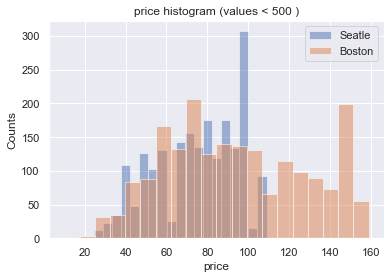

In [449]:
def plot_multiple_hist(df1,df2, col, thresh = None, bins = 20): 
    """Plot multiple histogram in one gfigure
    Arguments:
    - df1: first dataframe
    - df2: second fdataframe
    - col: the variable name (column)
    - thresh: threshold used for shifted data, if given threshold values < thresh are plotted
    - bins: used for histogram plot
    Outputs: 
    - The two histograms of col in df1 and df2
    """
    
    if thresh:
        data1 = df1[col][df1[col]< thresh]
        data2 = df2[col][df2[col]< thresh]
    else:
        data1 = df1[col]
        data2 = df2[col]
    data1.hist(bins = bins, alpha = 0.5, label='Seatle')
    data2.hist(bins = bins, alpha = 0.5, label='Boston')
    plt.legend()
    plt.xlabel(col)
    plt.ylabel("Counts")
    if thresh :
        plt.title("{} histogram (values < {} )".format(col, thresh))
    else:
        plt.title(col+ " histogram")
    
plot_multiple_hist(seatle_data,boston_data, "price", thresh=500)

It is clear that Boston prices are little bit higher and regrouped between 70  and 300, while most of Seatle prices are between 10 and 200.

In the following chart, the mean, the median, and the 3rd quartile are dropped for both datasets.

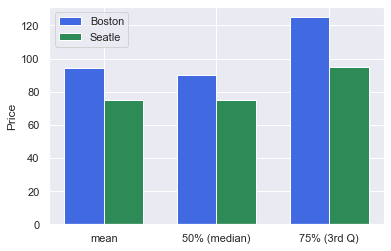

In [450]:
# get mean, median and 3rd quartile of the price.
se = seatle_data["price"].describe().drop(["count", "min", "max","std","25%"])
bo = boston_data["price"].describe().drop(["count", "min", "max","std","25%"])
# plot mean, median, 3rd Q
fig = plt.figure()
ax = fig.add_subplot(111)
ind = np.array([1, 2, 3])
rects1 = ax.bar(ind, bo, 0.35, color='royalblue', label = 'Boston')
rects2 = ax.bar(ind+0.35, se, 0.35, color='seagreen', label = 'Seatle')
plt.xticks(ind+0.35/2 , ('mean', '50% (median)', '75% (3rd Q)'))
plt.ylabel("Price")
# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

**Based on mean, median and the thrd quartile it is clear that Boston city is expensive than Seatle.**

## Which property type most hosted

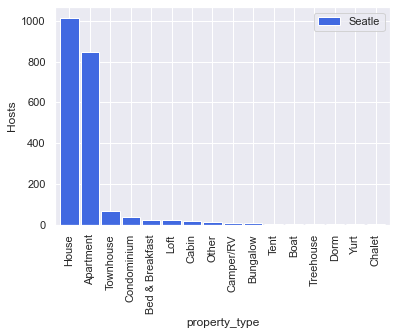

In [451]:
perc_seatle = seatle_data.groupby("property_type")["id"].count().sort_values(ascending = False)
perc_seatle.plot(kind = 'bar', width= 0.9, color='royalblue', label = 'Seatle')

plt.ylabel("Hosts")
# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

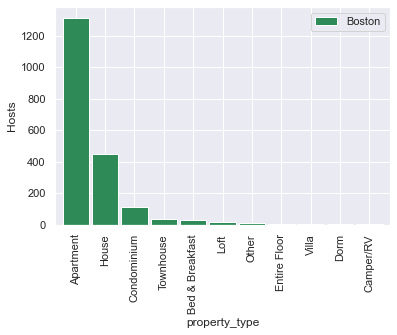

In [452]:
perc_boston = boston_data.groupby("property_type")["id"].count().sort_values(ascending = False)
perc_boston.plot(kind = 'bar', width= 0.9, color='seagreen', label = 'Boston')
plt.ylabel("Hosts")
# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

We can notice that Apartement, House, Condominium, and Townhouse are the most hosted properties. Lets see their percentage to the overall all hosts!


In [453]:
perc_seatle = (seatle_data.groupby("property_type")["id"].count().sort_values(ascending = False)/len(seatle_data)*100)[:4].sum()
perc_boston = (boston_data.groupby("property_type")["id"].count().sort_values(ascending = False)/len(boston_data) * 100)[:4].sum()

print("Three property types cover over {} % hosts for Seatle, and {} % hosts for Boston ".format(perc_seatle, perc_boston))

Three property types cover over 94.97098646034814 % hosts for Seatle, and 96.71052631578948 % hosts for Boston 


## Price by Neighbourhood 
We create a barchart that plots and compares neighbourhoods based on price

Credits to " https://github.com/OliviaCrrbb/Boston-Airbnb-Price-Analysis-Modelling/blob/main/Airbnb%20Boston%20Price%20Analysis%26Modelling%20.ipynb "

In [440]:
def barchart(df_lis,group_col, column,sort_value):
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=90)
    df_lis_map_price = df_lis.sort_values(by = sort_value)
    sns.barplot(x=group_col, y=column, data = df_lis)
    plt.xlabel(xlabel='{} Neihbourhoods'.format(group_col), fontsize=18)
    plt.ylabel(ylabel=column, fontsize=18)

In [454]:
seatl_nei = seatle_data["neighbourhood"].nunique()
print("there are {} neighbourhoods in Seatle city".format(seatl_nei))

there are 78 neighbourhoods in Seatle city


In [455]:
boston_nei = boston_data["neighbourhood"].nunique()
print("there are {} neighbourhoods in Seatle city".format(boston_nei))

there are 28 neighbourhoods in Seatle city


In [456]:
seatle_data.groupby("neighbourhood")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Alki,7.0,94.142857,8.668498,79.0,90.00,100.0,100.00,100.0
Arbor Heights,2.0,77.000000,32.526912,54.0,65.50,77.0,88.50,100.0
Atlantic,25.0,72.160000,16.622475,35.0,60.00,70.0,90.00,100.0
Ballard,130.0,75.530769,18.623644,25.0,60.00,76.0,90.00,105.0
Belltown,46.0,88.956522,17.728767,35.0,80.00,95.0,100.00,107.0
...,...,...,...,...,...,...,...,...
Wallingford,79.0,72.594937,22.940010,39.0,55.00,70.0,95.00,109.0
Wedgewood,12.0,73.000000,15.695975,48.0,63.75,70.0,81.25,100.0
Westlake,6.0,78.166667,14.148027,65.0,66.00,77.0,85.00,100.0


In [457]:
boston_data.groupby("neighbourhood")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Allston-Brighton,640.0,85.578125,34.520369,10.0,60.00,79.5,110.00,159.0
Back Bay,70.0,120.485714,25.993724,40.0,100.00,122.5,145.00,159.0
Beacon Hill,65.0,127.953846,23.678465,75.0,107.00,130.0,150.00,159.0
Brookline,7.0,99.000000,41.251263,39.0,80.00,89.0,125.00,155.0
Cambridge,3.0,125.666667,13.576941,113.0,118.50,124.0,132.00,140.0
Charlestown,28.0,118.857143,40.941434,39.0,94.25,142.0,150.00,158.0
Chestnut Hill,4.0,70.750000,16.600703,50.0,63.50,71.5,78.75,90.0
Chinatown,14.0,119.642857,19.044915,93.0,111.50,119.0,123.75,159.0
Dorchester,170.0,80.117647,30.274840,29.0,60.00,71.0,98.25,153.0


In [458]:
top_n = 5
expensive_nei_se = seatle_data.groupby("neighbourhood")["price"].describe()["mean"].sort_values(ascending = False).index[:top_n]
print("most expensive neighbourhoods in Seatle city are {} ".format(list(expensive_nei_se)))


most expensive neighbourhoods in Seatle city are ['South Park', 'North College Park', 'Alki', 'Pike Market', 'South Lake Union'] 


In [459]:
top_n = 5
expensive_nei_bo = boston_data.groupby("neighbourhood")["price"].describe()["mean"].sort_values(ascending = False).index[:top_n]
print("most expensive neighbourhoods in Boston city are {} ".format(list(expensive_nei_bo)))

most expensive neighbourhoods in Boston city are ['Leather District', 'Theater District', 'Beacon Hill', 'Cambridge', 'West End'] 


If you look at the cheapest neighbourhoods you can check

In [460]:
cheap_nei_se = seatle_data.groupby("neighbourhood")["price"].describe()["mean"].sort_values(ascending = False).index[-5:]
print("cheapest neighbourhoods in Seatle city are {} ".format(list(cheap_nei_se)))

cheapest neighbourhoods in Seatle city are ['South Beacon Hill', 'Rainier Beach', 'Seward Park', 'Holly Park', 'View Ridge'] 


In [461]:
cheap_nei_bo = boston_data.groupby("neighbourhood")["price"].describe()["mean"].sort_values(ascending = False).index[-5:]
print("cheapest neighbourhoods in Boston city are {} ".format(list(cheap_nei_bo)))

cheapest neighbourhoods in Boston city are ['Mission Hill', 'Chestnut Hill', 'Somerville', 'Mattapan', 'Hyde Park'] 


# Bonus
## Other data exploration

Get Pearson correlation.

Text(0.5, 1.0, 'Seatle correlation')

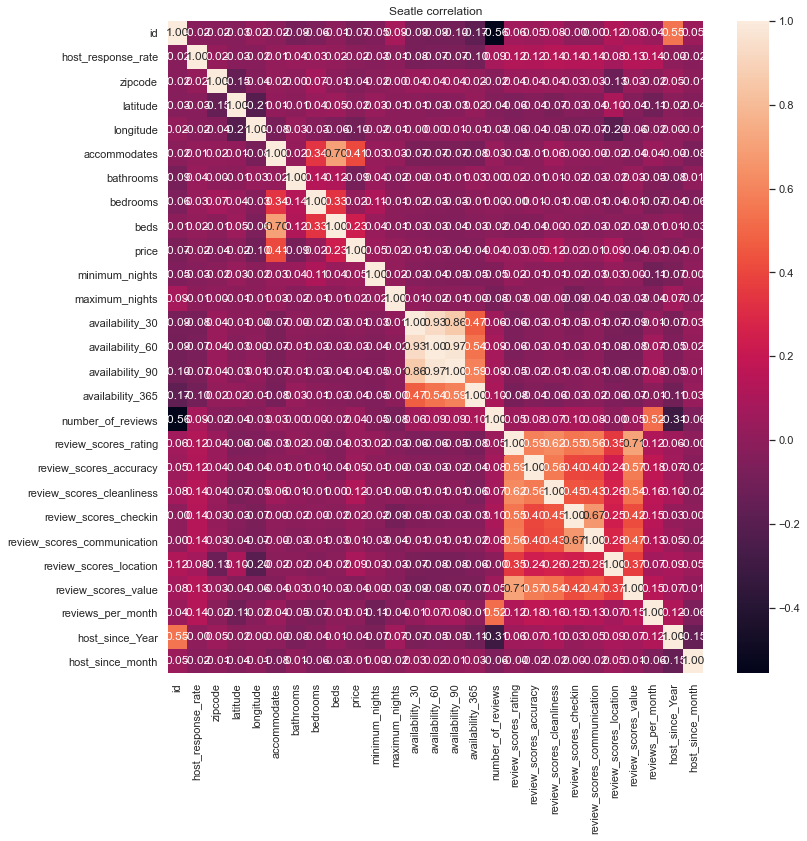

In [462]:
#see correlation in data for Boston
fig, ax = plt.subplots(figsize=(12,12))    
sns.heatmap(seatle_data.corr(), annot=True, fmt='.2f', ax = ax);
plt.title("Seatle correlation")

Text(0.5, 1.0, 'Boston correlation')

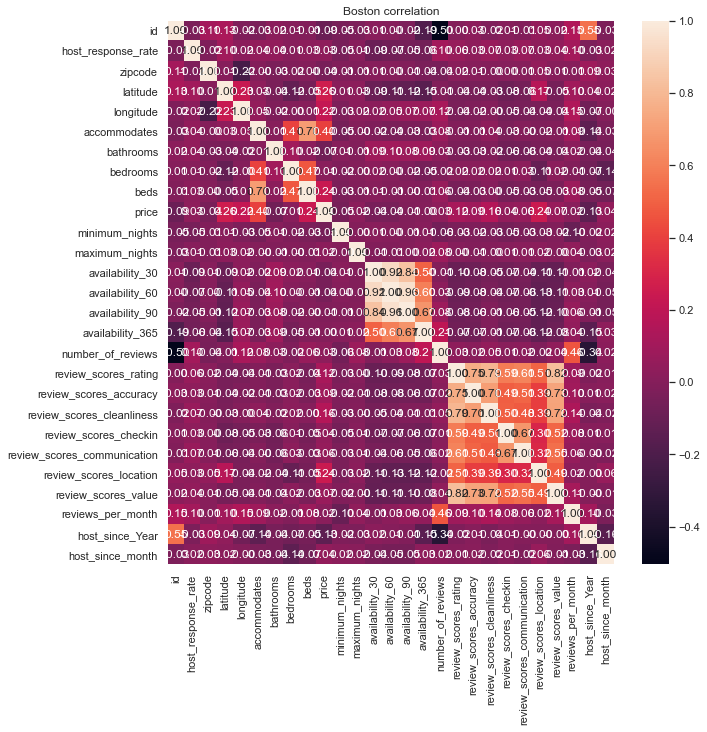

In [463]:
#see correlation in data for Boston
fig, ax = plt.subplots(figsize=(10,10))    
sns.heatmap(boston_data.corr(), annot=True, fmt='.2f', ax = ax);
plt.title("Boston correlation")

<AxesSubplot:>

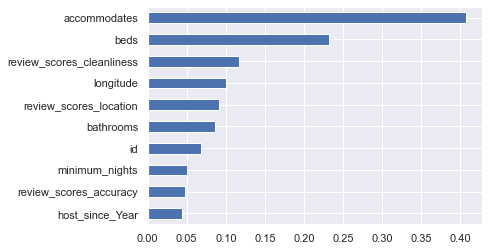

In [464]:
seatle_corr = seatle_data.corr()
abs(seatle_corr["price"]).sort_values(ascending = True)[-11:-1].plot(kind = 'barh')

<AxesSubplot:>

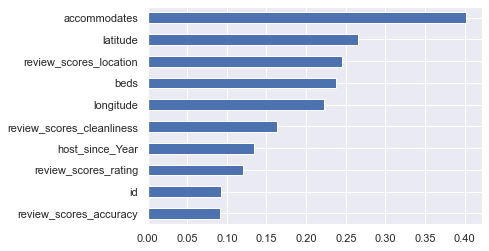

In [465]:
boston_corr = boston_data.corr()
abs(boston_corr["price"]).sort_values(ascending = True)[-11:-1].plot(kind = 'barh')

From the two correlation graphs we can notice that accommodates, bedrooms, beds, and bathrooms are the on the top of list for both cities, which is straitforward. The remaining top features are related to reviews and location (long & lat).

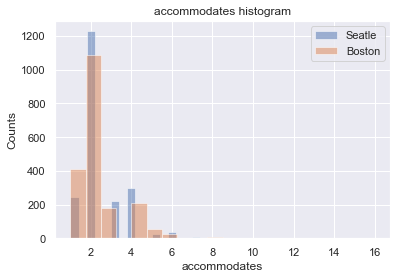

In [466]:
plot_multiple_hist(seatle_data,boston_data, "accommodates")

### Other relationship exploration.

In [467]:
def barchart(df_lis,group_col, column,sort_value):
    plt.figure(figsize=(7,7))
    plt.xticks(rotation=90)
    df_lis_map_price = df_lis.sort_values(by = sort_value)
    sns.barplot(x=group_col, y=column, data = df_lis)
    plt.xlabel(xlabel='{}'.format(group_col), fontsize=18)
    plt.ylabel(ylabel=column, fontsize=18)


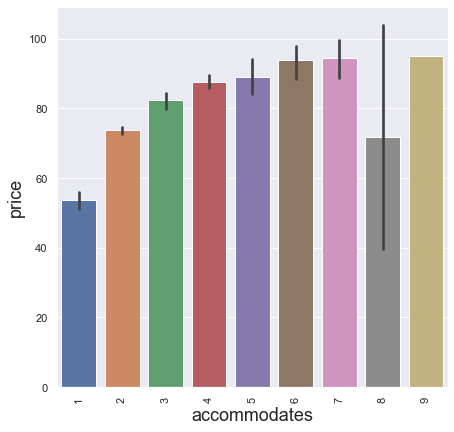

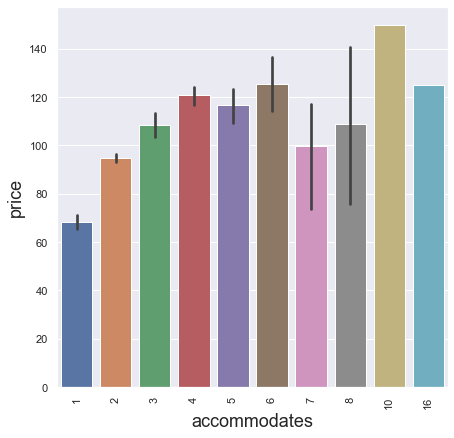

In [469]:

barchart(seatle_data,"accommodates",'price','price')
barchart(boston_data,"accommodates",'price','price')

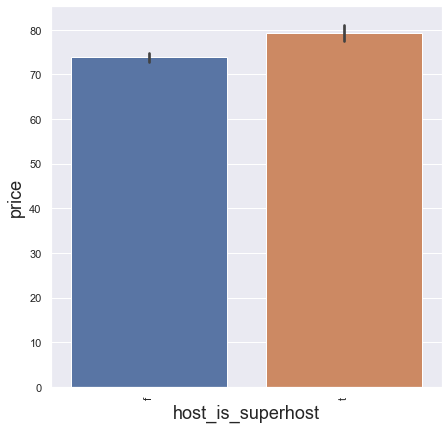

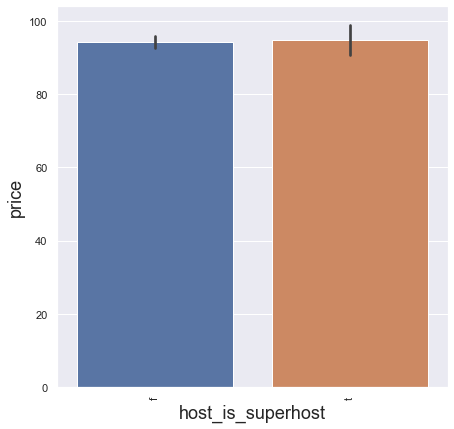

In [470]:
barchart(seatle_data,"host_is_superhost",'price','price')
barchart(boston_data,"host_is_superhost",'price','price')

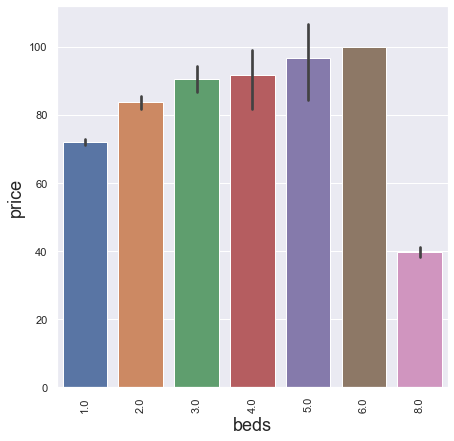

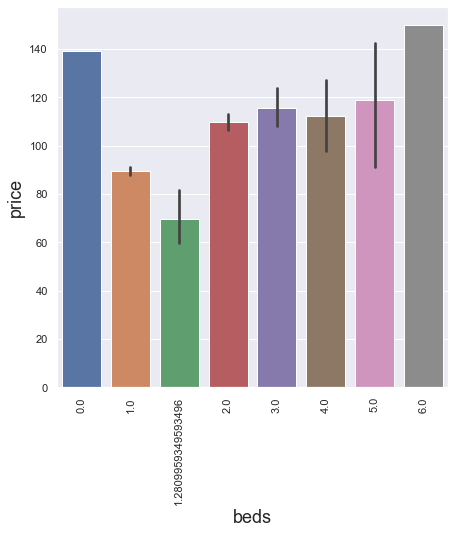

In [471]:
barchart(seatle_data,"beds",'price','price')
barchart(boston_data,"beds",'price','price')

### Review types

In [473]:
rev_cols = [x for x in seatle_data.columns if "review" in x]
print(rev_cols)

['number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']


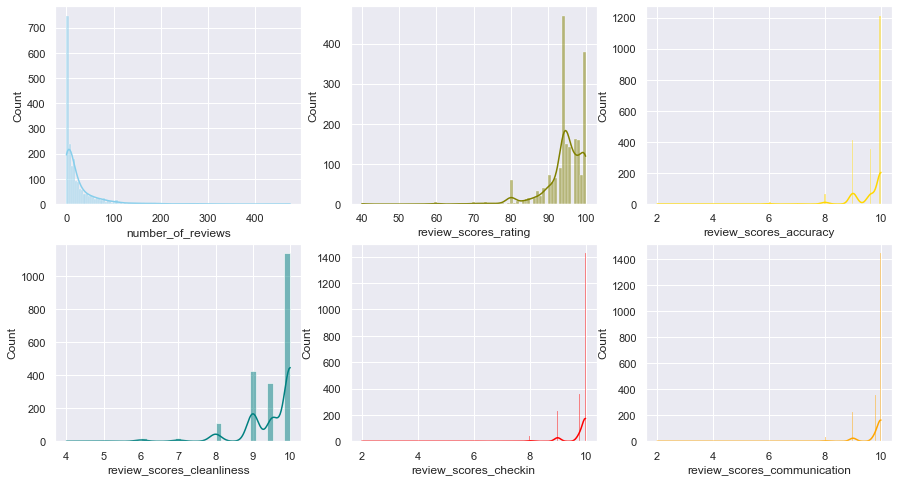

In [474]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")


fig, axs = plt.subplots(2, 3, figsize=(15, 8))

sns.histplot(data=seatle_data, x=rev_cols[0], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=seatle_data, x=rev_cols[1], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=seatle_data, x=rev_cols[2], kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=seatle_data, x=rev_cols[3], kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=seatle_data, x=rev_cols[4], kde=True, color="red", ax=axs[1, 1])
sns.histplot(data=seatle_data, x=rev_cols[5], kde=True, color="orange", ax=axs[1, 2])
plt.show()

We can say that all the reviews are skew shifted which make it hard to predict price based on these review without any further NLP processing or reviews.

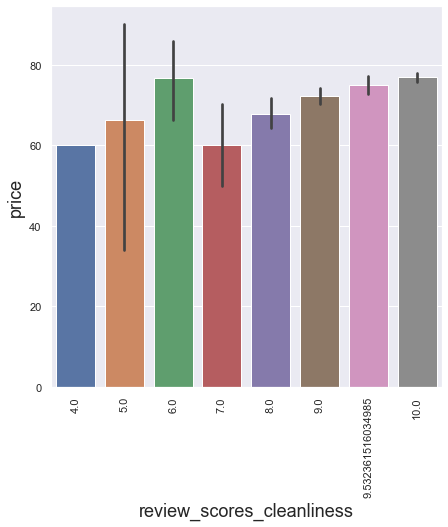

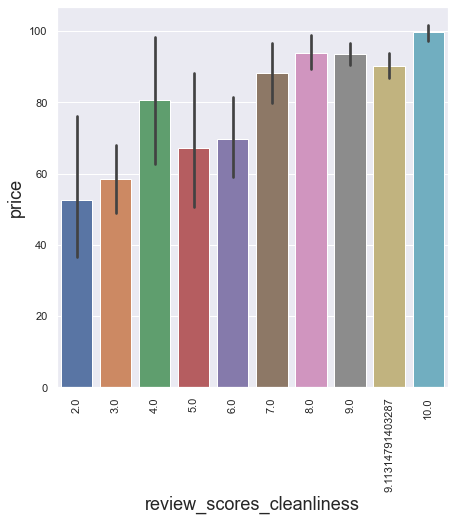

In [475]:
barchart(seatle_data,"review_scores_cleanliness",'price','price')
barchart(boston_data,"review_scores_cleanliness",'price','price')

It is clear that the price is much higher for houses with high cleanliness review. However, for Seatle houses the we can deduce that there is no impact.

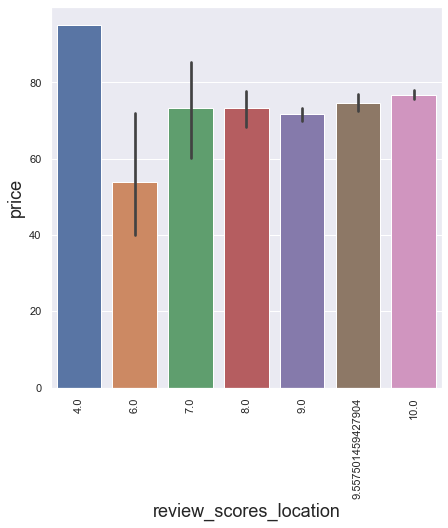

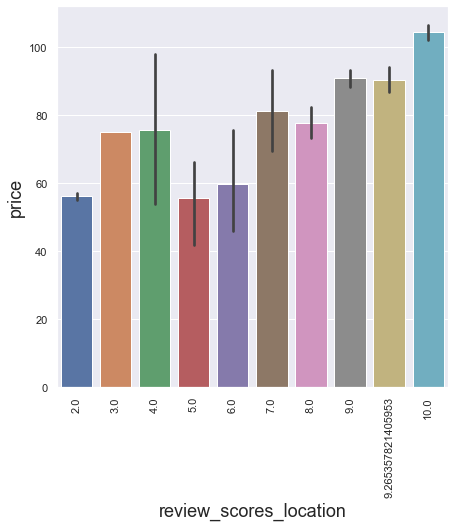

In [476]:
barchart(seatle_data,"review_scores_location",'price','price')
barchart(boston_data,"review_scores_location",'price','price')

# Price prediction

We will use LightGBM regressor to estimate the price. 

However before that we need to convert categorical vfeatures to numeric using get_dummies pandas function.

In [477]:
# the used function is from Udacity data science Nanodegree course.
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            - contains all columns that were not specified as categorical
            - dummy columns for each of the categorical columns in cat_cols
            - if dummy_na is True - it also contains dummy columns for the NaN values
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

#seatle_data = create_dummy_df(seatle_data, seatle_cat_cols, False)
#boston_data = create_dummy_df(boston_data, boston_cat_cols, False)


In [478]:
# For simplicity, here we will use the most pertinent features 
cols = ["latitude", "longitude", "accommodates", "bathrooms", "beds", "price"]
seatle_data_new = seatle_data[cols]
boston_data_new = boston_data[cols]

In [479]:
seatle_data_new.head()

,latitude,longitude,accommodates,bathrooms,beds,price
0,47.636289,-122.371025,4,1.0,1.0,85.0
3,47.638473,-122.369279,3,1.0,2.0,100.0
6,47.636605,-122.368519,2,1.0,1.0,80.0
7,47.640161,-122.375856,2,1.0,1.0,60.0
8,47.632410,-122.357216,2,1.0,1.0,90.0


### Prepare data

In [480]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

X_se = seatle_data_new.drop("price", axis = 1)
y_se = seatle_data_new.price
X_se_train, X_se_test, y_se_train, y_se_test = train_test_split(X_se, y_se, test_size=0.25, random_state=12)

X_bo = boston_data_new.drop("price", axis = 1)
y_bo = boston_data_new.price
X_bo_train, X_bo_test, y_bo_train, y_bo_test = train_test_split(X_bo, y_bo, test_size=0.25, random_state=12)

### Fit estimators

Configure LightGBM

In [481]:
import lightgbm as lgb
hyper_params = {
    'task': 'train',
    'verbose': -1,
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 10,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 500
}

In [482]:
# get val data
X_se_train, X_se_val, y_se_train, y_se_val = train_test_split(X_se_train, y_se_train, test_size=0.2, random_state=7)


lgb_train = lgb.Dataset(X_se_train, y_se_train, params=hyper_params, free_raw_data=False)
lgb_eval = lgb.Dataset(X_se_val, y_se_val, params=hyper_params, free_raw_data=False)
gbm_se = lgb.train(hyper_params, lgb_train,
                valid_sets=lgb_eval,
                verbose_eval=False)

C:\Users\Khaled\anaconda3\envs\azure\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Khaled\anaconda3\envs\azure\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_iterations is set=500, n_estimators=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] num_iterations is set=500, n_estimators=500 will be ignored. Current value: num_iterations=500


In [483]:
# RMSE
y_pred = gbm_se.predict(X_se_test)
from sklearn.metrics import mean_squared_error
print('The rmse of prediction is:', round(mean_squared_error(y_pred, y_se_test) ** 0.5, 5))

The rmse of prediction is: 17.3469


In [484]:
# get val data
X_bo_train, X_bo_val, y_bo_train, y_bo_val = train_test_split(X_bo_train, y_bo_train, test_size=0.2, random_state=7)

lgb_train = lgb.Dataset(X_bo_train, y_bo_train, params=hyper_params, free_raw_data=False)
lgb_eval = lgb.Dataset(X_bo_val, y_bo_val, params=hyper_params, free_raw_data=False)
gbm_bo = lgb.train(hyper_params, lgb_train,
                valid_sets=lgb_eval,
                verbose_eval=False)



C:\Users\Khaled\anaconda3\envs\azure\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Khaled\anaconda3\envs\azure\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_iterations is set=500, n_estimators=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] num_iterations is set=500, n_estimators=500 will be ignored. Current value: num_iterations=500


In [485]:
# RMSE
y_pred = gbm_bo.predict(X_bo_test)
from sklearn.metrics import mean_squared_error
print('The rmse of prediction is:', round(mean_squared_error(y_pred, y_bo_test) ** 0.5, 5))

The rmse of prediction is: 25.31531
